<a href="https://colab.research.google.com/github/evpozdniakov/ds_projects/blob/master/hw11/clusterisation_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

Так как изначально данные были представлены для решения задачи классификации, то они находятся в разных файлах (обучающая и тестовая выборки в соотношении 70/30). Соедините признаки так, чтобы сначала шла обучающая выборка, а затем — тестовая, и отдельно соедините значения целевых переменных (разумеется, в том же порядке).

In [2]:
X_train = pd.read_csv('https://github.com/evpozdniakov/ds_projects/raw/master/hw11/data/train.txt', sep=';', header=None)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [3]:
X_test = pd.read_csv('https://github.com/evpozdniakov/ds_projects/raw/master/hw11/data/test.txt', sep=';', header=None)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [4]:
X = pd.concat([X_train, X_test], axis=0)

Какая размерность получилась у набора данных с признаками?

In [5]:
X.shape

(10299, 561)

Теперь найдите число различных активностей, то есть на сколько кластеров в идеале должны разделиться наблюдения.

In [6]:
y_train = pd.read_csv('https://github.com/evpozdniakov/ds_projects/raw/master/hw11/data/train_labels.txt', header=None)
y_train.columns = ['label']

y_test = pd.read_csv('https://github.com/evpozdniakov/ds_projects/raw/master/hw11/data/test_labels.txt', header=None)
y_test.columns = ['label']
# y_test.head()


In [7]:
y = pd.concat([y_train, y_test], axis=0)

In [8]:
y['label'].unique()

array([5, 4, 6, 1, 3, 2])

Далее необходимо отмасштабировать признаки. Будем использовать для этого алгоритм StandardScaler. Примените его ко всем значениям признаков...

In [16]:
from sklearn import preprocessing as ce

X_transformed = X.copy()
columns_to_scale = X_transformed.columns.to_list()
# create scaler once and fit it to some initial data
scaler = ce.StandardScaler()

scaler.fit(X_transformed[columns_to_scale])
# use the scaler for data (once or many times)
ndarr = scaler.transform(X_transformed[columns_to_scale])
# create a DataFrame out of ndarr
norm_df = pd.DataFrame(ndarr, columns=columns_to_scale).set_index(X_transformed.index)
# update the transformed columns data
X_transformed.loc[:, columns_to_scale] = norm_df[columns_to_scale]

X = X_transformed[columns_to_scale]

...и впишите в качестве ответа значение первого признака для первого объекта, предварительно округлив его до двух знаков после точки-разделителя.

In [22]:
round(X.iloc[0][0], 2)

0.21

Пора переходить к кластеризации. Для начала определите оптимальное количество кластеров, используя внутренние меры кластеризации. Используйте все известные вам коэффициенты, реализуемые в библиотеке sklearn: коэффициент силуэта, индекс Калински — Харабаса и индекс Дэвиса — Болдина. В качестве алгоритма возьмите k-means++, в качестве значения параметра random_state — число 42.

Выведите оптимальное количество кластеров для каждой метрики, перебирая значения от 2 до 9 включительно. Также введите значение каждой метрики, округлённое до двух знаков после точки-разделителя.

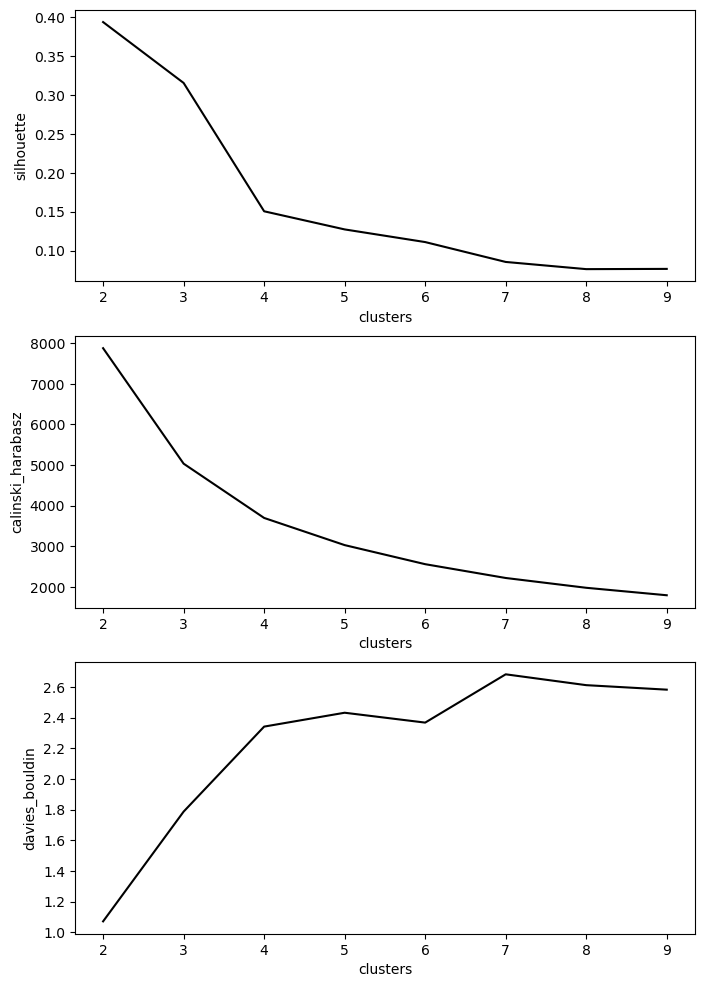

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import KMeans

def figax(name, figsize=(7, 4), rowcol=None, axes=[0,0,1,1]):
    fig = plt.figure(name, figsize=figsize)

    if rowcol is None:
        ax = fig.add_axes(axes)
    else:
        rows, cols = rowcol
        ax = fig.subplots(rows, cols)

    return fig, ax

def draw_cluster_metrics(X, k_range=range(2, 10)):
    def get_metric_scores(X, k):
        km = KMeans(n_clusters=k, init='k-means++', random_state=42)
        km.fit_predict(X)
        return (
            k,
            metrics.silhouette_score(X, km.labels_),
            metrics.calinski_harabasz_score(X, km.labels_),
            metrics.davies_bouldin_score(X, km.labels_),
        )

    metric_scores_data = pd.DataFrame(
        data=[get_metric_scores(X, k) for k in k_range],
        columns=['clusters', 'silhouette', 'calinski_harabasz', 'davies_bouldin'],
    )

    fig, ax = figax('cluster_metrics', figsize=(8, 12), rowcol=(3, 1))
    sns.lineplot(ax=ax[0], data=metric_scores_data, x='clusters', y='silhouette', color='black')
    sns.lineplot(ax=ax[1], data=metric_scores_data, x='clusters', y='calinski_harabasz', color='black')
    sns.lineplot(ax=ax[2], data=metric_scores_data, x='clusters', y='davies_bouldin', color='black')

    return metric_scores_data

metric_scores_data = draw_cluster_metrics(X)

In [25]:
metric_scores_data

,clusters,silhouette,calinski_harabasz,davies_bouldin
0,2,0.393732,7880.813904,1.070744
1,3,0.315484,5034.475257,1.786516
2,4,0.150529,3696.338198,2.340930
3,5,0.127237,3027.076172,2.431375
4,6,0.110969,2556.773574,2.367036
5,7,0.085419,2216.563937,2.681980
6,8,0.076183,1974.971496,2.611226
7,9,0.076488,1790.953173,2.581888


Теперь давайте оценим качество кластеризации с точки зрения внешних мер. Реализуйте кластеризацию с помощью классической версии алгоритма k-means. Пусть количество кластеров будет соответствовать количеству активностей. Параметр random_state = 42. В качестве ответов введите значения получившихся мер, предварительно округлив их до двух знаков после точки-разделителя.

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics import adjusted_rand_score

k_means = KMeans(
    n_clusters=6, # количество кластеров, default 8
    init='random', # default k-means++
    random_state=42,
)

k_means.fit(X);

labels_true = y['label']
labels_pred = k_means.predict(X)

homogeneity = homogeneity_score(labels_true, labels_pred)
print(f'Homogenity: {homogeneity}')

completeness = completeness_score(labels_true, labels_pred)
print(f'Completness: {completeness}')

ari = adjusted_rand_score(labels_true, labels_pred)
print(f'ARI: {ari}')


Homogenity: 0.5404114294595578
Completness: 0.5809491951515007
ARI: 0.4196031125923396


Выясните, к каким кластерам были преимущественно отнесены различные активности (т. е. в какой кластер попало большинство наблюдений с этой активностью). Нумерацию кластеров начинайте с 1.

In [27]:
labels_true_pred_df = pd.DataFrame({
    "true": labels_true,
    "pred": labels_pred,
})


In [32]:
for i in range(1, 7):
    m = labels_true_pred_df['true'] == i
    cluster = labels_true_pred_df[m]['pred'].value_counts().index[0] + 1
    print(f'Большинство наблюдений с меткой {i} попало в кластер {cluster}')

Большинство наблюдений с меткой 1 попало в кластер 3
Большинство наблюдений с меткой 2 попало в кластер 3
Большинство наблюдений с меткой 3 попало в кластер 5
Большинство наблюдений с меткой 4 попало в кластер 2
Большинство наблюдений с меткой 5 попало в кластер 2
Большинство наблюдений с меткой 6 попало в кластер 1


Теперь попробуйте реализовать алгоритм k-means для двух кластеров (для того числа активностей, которое является оптимальным с точки зрения внутренних мер) и снова посмотреть, как алгоритм разобьёт активности по кластерам. Как и в предыдущем задании, нумерацию кластеров начинайте с 1.

In [33]:
k_means = KMeans(
    n_clusters=2, # количество кластеров, default 8
    init='random', # default k-means++
    random_state=42,
)

k_means.fit(X);

labels_true = y['label']
labels_pred = k_means.predict(X)

labels_true_pred_df = pd.DataFrame({
    "true": labels_true,
    "pred": labels_pred,
})

for i in range(1, 7):
    m = labels_true_pred_df['true'] == i
    cluster = labels_true_pred_df[m]['pred'].value_counts().index[0] + 1
    print(f'Большинство наблюдений с меткой {i} попало в кластер {cluster}')

Большинство наблюдений с меткой 1 попало в кластер 1
Большинство наблюдений с меткой 2 попало в кластер 1
Большинство наблюдений с меткой 3 попало в кластер 1
Большинство наблюдений с меткой 4 попало в кластер 2
Большинство наблюдений с меткой 5 попало в кластер 2
Большинство наблюдений с меткой 6 попало в кластер 2


Вычислите значение полноты для разбиения на два кластера алгоритмом k-means. Ответ округлите до двух знаков после точки-разделителя.

In [37]:
completeness = completeness_score(labels_true, labels_pred)
print(f'Completness: {completeness}')

Completness: 0.979530559699631


Давайте сравним полученный результат с агломеративной иерархической кластеризацией. Реализуйте её также для двух кластеров и вычислите значение полноты.



In [40]:
from sklearn.cluster import AgglomerativeClustering

ag_cl = AgglomerativeClustering(n_clusters=2)
ag_cl.fit(X);

labels_true = y['label']
labels_pred = ag_cl.labels_

completeness = completeness_score(labels_true, labels_pred)
print(f'Completness: {completeness}')

Completness: 0.9999999999999993
